In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import gzip
import pickle
import numpy as np
warnings.filterwarnings("ignore")

# Análisis resultados Modelo Item - Item

In [3]:
PathItem = "D:/Dataset_1/lastfm-dataset-1K/Modelo_Item_Item/"
%cd "D:/Dataset_1/lastfm-dataset-1K/Modelo_Item_Item/"

D:\Dataset_1\lastfm-dataset-1K\Modelo_Item_Item


In [4]:
df_resultado_moditem =  pd.read_pickle(PathItem + "1.Evaluacion_Cos_Pearson_Jaccard_ModeloItem.pkl")
df_resultado_moditem_mac1 =  pd.read_pickle(PathItem + "1.Evaluacion_Cos_Pearson_Jaccard_Modeloitem_Mclaughlin.pkl")
# Variable tiempo total
df_resultado_moditem['Tiempo_Total'] =  (df_resultado_moditem.Fin_seg - df_resultado_moditem.Inicio_seg)/60
df_resultado_moditem_mac1['Tiempo_Total'] =  (df_resultado_moditem_mac1.Fin_seg - df_resultado_moditem_mac1.Inicio_seg)/60

In [5]:
# Selección de valores
df_resultado_moditem = df_resultado_moditem[(df_resultado_moditem.Tamanio_Vecindario == 28)|(df_resultado_moditem.Tamanio_Vecindario == 30)|(df_resultado_moditem.Tamanio_Vecindario == 32)]
df_resultado_moditem = df_resultado_moditem[(df_resultado_moditem.Umbral_Similitud == .5)|(df_resultado_moditem.Umbral_Similitud == .6)|(df_resultado_moditem.Umbral_Similitud == .7)]

In [34]:
df_resultado_moditem.to_pickle(PathItem +"1.Evaluacion_Cos_Pearson_Jaccard_ModeloItem_Final.pkl")

In [6]:
df_resultado_moditem.describe()

,Tamanio_Vecindario,Umbral_Similitud,Inicio_seg,Fin_seg,RMSE,Tiempo_Total
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,30.000000,0.600000,31222.547922,33193.761330,0.708411,32.853557
std,1.664101,0.083205,26574.254958,26837.096499,0.021601,20.640914
min,28.000000,0.500000,221.149675,3471.004530,0.675438,5.638948
25%,28.000000,0.500000,12242.512757,13305.900249,0.680646,5.793793
50%,30.000000,0.600000,15692.460821,16554.559447,0.720122,38.663140
75%,32.000000,0.700000,61340.466835,63579.549085,0.725604,53.949648
max,32.000000,0.700000,76392.355544,78627.085416,0.729540,55.349939


In [10]:
# Medida Jaccard
df2_jaccard = df_resultado_moditem[(df_resultado_moditem['Indice']=='jaccard') & (df_resultado_moditem['Umbral_Similitud'] == .5)].sort_values('Tamanio_Vecindario', ascending=True)
df3_jaccard = df_resultado_moditem[(df_resultado_moditem['Indice']=='jaccard') & (df_resultado_moditem['Umbral_Similitud'] == .6)].sort_values('Tamanio_Vecindario', ascending=True)
df4_jaccard = df_resultado_moditem[(df_resultado_moditem['Indice']=='jaccard') & (df_resultado_moditem['Umbral_Similitud'] == .7)].sort_values('Tamanio_Vecindario', ascending=True)

In [11]:
# Medida coseno
df2_cos = df_resultado_moditem[(df_resultado_moditem['Indice']=='cosine') & (df_resultado_moditem['Umbral_Similitud'] == .5)].sort_values('Tamanio_Vecindario', ascending=True)
df3_cos = df_resultado_moditem[(df_resultado_moditem['Indice']=='cosine') & (df_resultado_moditem['Umbral_Similitud'] == .6)].sort_values('Tamanio_Vecindario', ascending=True)
df4_cos = df_resultado_moditem[(df_resultado_moditem['Indice']=='cosine') & (df_resultado_moditem['Umbral_Similitud'] == .7)].sort_values('Tamanio_Vecindario', ascending=True)

In [12]:
# Medida Pearson
df2_pear = df_resultado_moditem[(df_resultado_moditem['Indice']=='pearson') & (df_resultado_moditem['Umbral_Similitud'] == .5)].sort_values('Tamanio_Vecindario', ascending=True)
df3_pear = df_resultado_moditem[(df_resultado_moditem['Indice']=='pearson') & (df_resultado_moditem['Umbral_Similitud'] == .6)].sort_values('Tamanio_Vecindario', ascending=True)
df4_pear = df_resultado_moditem[(df_resultado_moditem['Indice']=='pearson') & (df_resultado_moditem['Umbral_Similitud'] == .7)].sort_values('Tamanio_Vecindario', ascending=True)

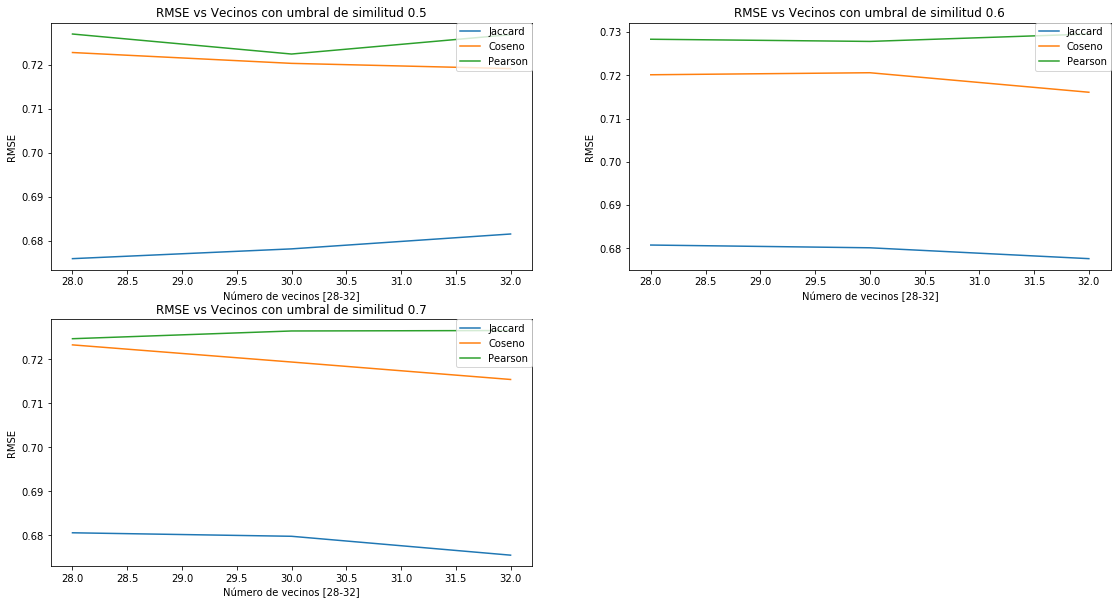

In [14]:
plt.figure(1, figsize=(19,10))

plt.subplot(221)
plt.plot(df2_jaccard['Tamanio_Vecindario'],df2_jaccard['RMSE'], label = 'Jaccard' )
plt.plot(df2_cos['Tamanio_Vecindario'],df2_cos['RMSE'], label = 'Coseno' )
plt.plot(df2_pear['Tamanio_Vecindario'],df2_pear['RMSE'], label = 'Pearson' )
plt.xlabel('Número de vecinos [28-32]')
plt.ylabel('RMSE')
plt.title('RMSE vs Vecinos con umbral de similitud 0.5')
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.)

plt.subplot(222)
plt.plot(df3_jaccard['Tamanio_Vecindario'],df3_jaccard['RMSE'], label = 'Jaccard' )
plt.plot(df3_cos['Tamanio_Vecindario'],df3_cos['RMSE'], label = 'Coseno' )
plt.plot(df3_pear['Tamanio_Vecindario'],df3_pear['RMSE'], label = 'Pearson' )
plt.xlabel('Número de vecinos [28-32]')
plt.ylabel('RMSE')
plt.title('RMSE vs Vecinos con umbral de similitud 0.6')
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.)

plt.subplot(223)
plt.plot(df4_jaccard['Tamanio_Vecindario'],df4_jaccard['RMSE'], label = 'Jaccard' )
plt.plot(df4_cos['Tamanio_Vecindario'],df4_cos['RMSE'], label = 'Coseno' )
plt.plot(df4_pear['Tamanio_Vecindario'],df4_pear['RMSE'], label = 'Pearson' )
plt.xlabel('Número de vecinos [28-32]')
plt.ylabel('RMSE')
plt.title('RMSE vs Vecinos con umbral de similitud 0.7')
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.)

plt.show()

In [21]:
df_tiempos  = df_resultado_moditem.groupby(['Indice', 'Tamanio_Vecindario'])['Tiempo_Total'].mean().reset_index()
df_tiempos_jaccard = df_tiempos[df_tiempos.Indice == 'jaccard']
df_tiempos_cos = df_tiempos[df_tiempos.Indice == 'cosine']
df_tiempos_pear = df_tiempos[df_tiempos.Indice == 'pearson']

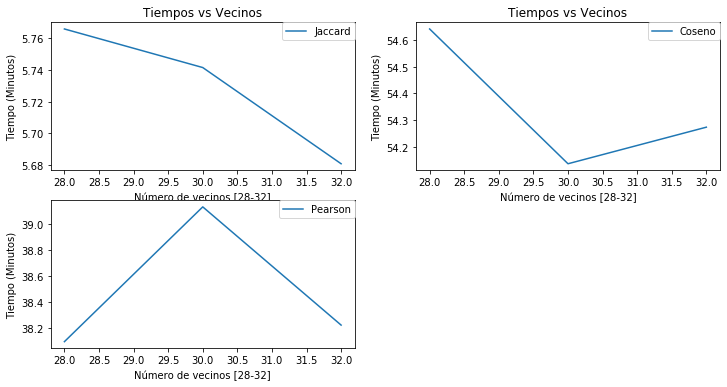

In [32]:
plt.figure(1, figsize=(12,6))

plt.subplot(221)
plt.plot(df_tiempos_jaccard['Tamanio_Vecindario'],df_tiempos_jaccard['Tiempo_Total'], label = 'Jaccard' )
#plt.plot(df_tiempos_cos['Tamanio_Vecindario'],df_tiempos_cos['Tiempo_Total'], label = 'Coseno' )
#plt.plot(df_tiempos_pear['Tamanio_Vecindario'],df_tiempos_pear['Tiempo_Total'], label = 'Pearson' )
plt.xlabel('Número de vecinos [28-32]')
plt.ylabel('Tiempo (Minutos)')
plt.title('Tiempos vs Vecinos')
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.)


plt.subplot(222)
#plt.plot(df_tiempos_jaccard['Tamanio_Vecindario'],df_tiempos_jaccard['Tiempo_Total'], label = 'Jaccard' )
plt.plot(df_tiempos_cos['Tamanio_Vecindario'],df_tiempos_cos['Tiempo_Total'], label = 'Coseno' )
#plt.plot(df_tiempos_pear['Tamanio_Vecindario'],df_tiempos_pear['Tiempo_Total'], label = 'Pearson' )
plt.xlabel('Número de vecinos [28-32]')
plt.ylabel('Tiempo (Minutos)')
plt.title('Tiempos vs Vecinos')
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.)

plt.subplot(223)
#plt.plot(df_tiempos_jaccard['Tamanio_Vecindario'],df_tiempos_jaccard['Tiempo_Total'], label = 'Jaccard' )
#plt.plot(df_tiempos_cos['Tamanio_Vecindario'],df_tiempos_cos['Tiempo_Total'], label = 'Coseno' )
plt.plot(df_tiempos_pear['Tamanio_Vecindario'],df_tiempos_pear['Tiempo_Total'], label = 'Pearson' )
plt.xlabel('Número de vecinos [28-32]')
plt.ylabel('Tiempo (Minutos)')
#plt.title('Tiempos vs Vecinos')
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.)

plt.show()

# Ponderación por significacia con umbral de similitud .7

In [45]:
df_resultado_moditem_mac1.Umbral_Similitud.unique()

array([0.8, 0.9])

In [46]:
umbral = 0.8

df_resultado_moditem_mac = df_resultado_moditem_mac1[(df_resultado_moditem_mac1['Umbral_Similitud'] == umbral)& (df_resultado_moditem_mac1['Tamanio_Vecindario'] == 36)]
df_resultado_moditem_mac2 = df_resultado_moditem_mac1[(df_resultado_moditem_mac1['Umbral_Similitud'] == umbral)& (df_resultado_moditem_mac1['Tamanio_Vecindario'] == 38)]
#Umbral de similitud .6 con vecinos 36
df1_mac_jaccard = df_resultado_moditem_mac[(df_resultado_moditem_mac['Indice'] == 'jaccard')].sort_values('Valor_Gamma', ascending = False)
df1_mac_cos = df_resultado_moditem_mac[(df_resultado_moditem_mac['Indice'] == 'cosine')].sort_values('Valor_Gamma', ascending = False)
#df1_mac_pear = df_resultado_moditem_mac[(df_resultado_moditem_mac['Indice'] == 'pearson')].sort_values('Valor_Gamma', ascending = False)

#Umbral de similitud .6 con vecinos 38
df1_mac_jaccard1 = df_resultado_moditem_mac2[(df_resultado_moditem_mac2['Indice'] == 'jaccard')].sort_values('Valor_Gamma', ascending = False)
df1_mac_cos1 = df_resultado_moditem_mac2[(df_resultado_moditem_mac2['Indice'] == 'cosine')].sort_values('Valor_Gamma', ascending = False)
#df1_mac_pear1 = df_resultado_moditem_mac2[(df_resultado_moditem_mac2['Indice'] == 'pearson')].sort_values('Valor_Gamma', ascending = False)

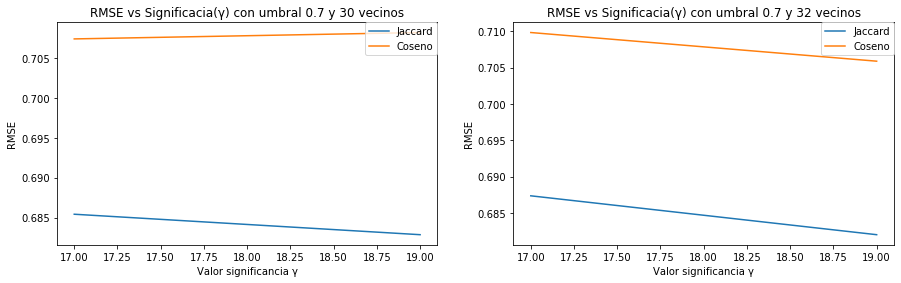

In [48]:
plt.figure(1, figsize=(15,9))
plt.subplot(221)
plt.plot(df1_mac_jaccard['Valor_Gamma'],df1_mac_jaccard['RMSE'], label = 'Jaccard' )
plt.plot(df1_mac_cos['Valor_Gamma'],df1_mac_cos['RMSE'], label = 'Coseno' )
#plt.plot(df1_mac_pear['Valor_Gamma'],df1_mac_pear['RMSE'], label = 'Pearson' )
plt.xlabel('Valor significancia γ')
plt.ylabel('RMSE')
plt.title('RMSE vs Significacia(γ) con umbral 0.7 y 30 vecinos')
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.)


plt.subplot(222)
plt.plot(df1_mac_jaccard1['Valor_Gamma'],df1_mac_jaccard1['RMSE'], label = 'Jaccard' )
plt.plot(df1_mac_cos1['Valor_Gamma'],df1_mac_cos1['RMSE'], label = 'Coseno' )
#plt.plot(df1_mac_pear1['Valor_Gamma'],df1_mac_pear1['RMSE'], label = 'Pearson' )
plt.xlabel('Valor significancia γ')
plt.ylabel('RMSE')
plt.title('RMSE vs Significacia(γ) con umbral 0.7 y 32 vecinos')
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.)

plt.show()

# Predicciones Modelo

In [49]:
#restore the object
f = gzip.open('3.Model_Item_Item.pklz','rb')
Model_II = pickle.load(f)

In [51]:
#Carga Dataframe Ratings
df_ratings = pd.read_pickle("1.Ratings_Normalizacion_Log.pkl")
df_ratings.rating_lineal = round(df_ratings.rating_lineal)
df_ratings['rating_lineal'] = df_ratings['rating_lineal'].astype('uint8')
#Carga Dataframe validación
df_validacion = pd.read_pickle("2.Datos_Validacion_ModeloItem.pkl")

In [54]:
#Realizar predicciones
lista_resultados = []
for i in range(df_validacion.shape[0]):
    user = df_validacion.iloc[i,0]
    artista = df_validacion.iloc[i,1]
    raiting_predict = Model_II.predict(user, artista).est
    lista_resultados.append([user,artista, raiting_predict])

In [55]:
df_predicciones = pd.DataFrame(lista_resultados, columns = ["user_id", "artname", "raiting_predict"])
#Cambio de tipo de dato
df_validacion.user_id = df_validacion.user_id.astype(str)
df_validacion.artname = df_validacion.artname.astype(str)
df_predicciones.user_id = df_predicciones.user_id.astype(str)
df_predicciones.artname = df_predicciones.artname.astype(str)

In [56]:
df_validacion['llave'] = df_validacion.user_id+"-"+df_validacion.artname
df_predicciones['llave'] = df_predicciones.user_id+"-"+df_predicciones.artname
# Join entre predecido y original

df_resultados_predi = df_validacion.merge(df_predicciones[['raiting_predict', 'llave']], left_on = "llave", right_on ="llave",  how='left')
df_resultados_predi.raiting_predict = round(df_resultados_predi.raiting_predict)
df_valid1 = df_resultados_predi.groupby(['rating'])['rating'].agg({'count'})
df_valid1 =  df_valid1.reset_index()
# Agregación por conteo

df_valid2 = df_resultados_predi.groupby(['raiting_predict'])['raiting_predict'].agg({'count'})
df_valid2 =  df_valid2.reset_index()
df_comparacion = df_valid1.merge(df_valid2[['count', 'raiting_predict']], left_on = "rating", right_on ="raiting_predict",  how='left')
df_comparacion = df_comparacion.rename(columns={"count_x": "Original", "count_y": "Predecido"})
df_comparacion.raiting_predict = np.nan_to_num(df_comparacion.raiting_predict)
df_comparacion.Predecido = np.nan_to_num(df_comparacion.Predecido)
df_comparacion['Diferencia %'] = round((df_comparacion.Original - df_comparacion.Predecido) / df_comparacion.Original *100)
del df_comparacion['raiting_predict']
df_comparacion

,rating,Original,Predecido,Diferencia %
0,1.0,21309,12536,41.0
1,2.0,24848,39743,-60.0
2,3.0,9573,4561,52.0
3,4.0,1168,112,90.0
4,5.0,58,4,93.0


In [402]:
f.close()